# Fake News Text Classifier

In recent year the rise of social media took the world by storm. It became increasingly easier to share one’s views and opinions on any matter. People end up getting bombarded with all kinds of information. The need to distinguish between what is accurate and what is fictional, is becoming a bigger and bigger priority. The Aim of this paper is to find out if, through the use of Natural Language Processing, it’s possible to create a classifier that can, to a reasonable degree of accuracy predict weather a news statement is in fact true of false.

## Preprocessing 

In [71]:
# Install all the needed pip packages in the current Jupyter kernel.
import sys
!{sys.executable} -m pip install --upgrade -r requirements.txt

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.3
    Uninstalling pip-22.3:
      Successfully uninstalled pip-22.3


### The True News Dataset

The following dataset contains True Accurate News artices.

I am making use of a Kaggle dataset. The dataset can be found here:
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?resource=download&select=True.csv

In [38]:
# Import Needed Libraries
import pandas as pd

#Read data from csv and create pd
true_df=pd.read_csv("True.csv") 

#Remove unneeded columns
true_df = true_df.drop(['title','subject','date'], axis = 1) 

true_df

,text
0,WASHINGTON (Reuters) - The head of a conservat...
1,WASHINGTON (Reuters) - Transgender people will...
2,WASHINGTON (Reuters) - The special counsel inv...
3,WASHINGTON (Reuters) - Trump campaign adviser ...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...
...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413,"LONDON (Reuters) - LexisNexis, a provider of l..."
21414,MINSK (Reuters) - In the shadow of disused Sov...
21415,MOSCOW (Reuters) - Vatican Secretary of State ...


### The Fake News Dataset

The following dataset contains Fake News artices.

I am making use of a Kaggle dataset. The dataset can be found here:
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?resource=download&select=Fake.csv

In [56]:
#Read data from csv and create pd
fake_df=pd.read_csv("Fake.csv") 

 #Remove unneeded columns
fake_df = fake_df.drop(['title','subject','date'], axis = 1)

fake_df

,text
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...
...,...
23476,21st Century Wire says As 21WIRE reported earl...
23477,21st Century Wire says It s a familiar theme. ...
23478,Patrick Henningsen 21st Century WireRemember ...
23479,21st Century Wire says Al Jazeera America will...


## Add Both Datasets Together And Shuffle the Full Dataset

In [84]:
fake_df['fake'] = '1'
true_df['fake'] = '0'

frames = [fake_df, true_df]

# Concatenating both dataframes
full_data = pd.concat(frames)

# Shuffle full_data
full_data = full_data.sample(frac=1).reset_index(drop=True)
full_data.index = [i for i in range(0,full_data.shape[0])]
full_data

,text,fake
0,GENEVA (Reuters) - President Bashar al-Assad a...,0
1,"Trump is off and running now, and I m here to ...",1
2,BERLIN (Reuters) - Ivanka Trump was booed in B...,0
3,This is why Republicans lost the black vote an...,1
4,MOSCOW (Reuters) - Russian lawmakers are to di...,0
...,...,...
44893,NY Gov. Andrew Cuomo (D) thinks he s the boss ...,1
44894,From the White House website:First Lady of the...,1
44895,Despite the damage that the presidency of Geor...,1
44896,BEIJING (Reuters) - China said on Wednesday it...,0


## Split Full Dataset into Training and Test Set

We added the True and Fake Datasets together and shuffled them to create the Full dataset. The Full dataset comes to 44897 rows. We'll now need to split this dataset into two new datasetes that will make up our **Training** and **Test datasets**. 

The **Training dataset** will be comprised of **80%** of the full dataset and the **Test dataset** will consist of the additional **20%** of the full dataset.

100% of full_data = 44897 rows

80% of full_data = 44897*80/100 = 35917.6 (lets round up to 35918) rows

20% of full_data = 44897 - 35918 = 8979 rows


Thus:

**train_data** = the first 35918 rows

**test_data** = the last 8979 rows


In [22]:
train_data = full_data.iloc[:35918,:]
train_data

,text,fake
0,JOHANNESBURG (Reuters) - A relative of Zimbabw...,0
1,The following statements were posted to the ve...,0
2,Hell begins freeze over Did We Ever Think That...,1
3,"WASHINGTON (Reuters) - Mitch McConnell, the U....",0
4,(Reuters) - The legal document charging Michae...,0
...,...,...
35913,A caller to British radio host Katie Hopkins w...,1
35914,WASHINGTON (Reuters) - U.S. President Donald T...,0
35915,JAKARTA (Reuters) - The head of an Indonesian ...,0
35916,LIMA (Reuters) - Peru proposed new talks to en...,0


In [23]:
test_data = full_data.iloc[8979:,:]
test_data

,text,fake
8979,SEOUL (Reuters) - The leaders of South Korea a...,0
8980,DHAKA (Reuters) - Pope Francis called on Thurs...,0
8981,BERLIN (Reuters) - If the United States termin...,0
8982,WASHINGTON (Reuters) - President Barack Obama ...,0
8983,WHAT YOU NEED TO KNOW:In all 50 state capitals...,1
...,...,...
44893,Don Lemon tries to blame Donald Trump for the ...,1
44894,ISTANBUL (Reuters) - Turkish authorities on Mo...,0
44895,"During a debate in New Hampshire, Republican S...",1
44896,You probably guessed it..he gave a line of tot...,1


## Classification Approach 

### Multinomial Naive Bayes

We'll make use of a **Multinomial Naive Bayes** classification approach. This differs to the traditional **Gaussian** approach to **Naive Bayes** in that, we assume that the features are generated from a *multinomial distribution*. 

In this approach, we're basically looking at the probability of observing counts across two main categories, namely *fake news* and *accurate news*. We then do our modeling by finding a best-fit multinomial distribution.

*Multinomial Naive Bayes* is a very suitable approach for this type of text classification where we're taking a fragment of text, or a blog post, or a passage of text, and we're trying to classify it according to some topical scheme. 

In this problem, the inside the two categories we are essentially looking at the word types, so all the different words that you might have in your vocabulary, data types and data categories. We then make use of the multinomial distribution to basically observing the counts across these various word types. 

### TfidfVectorizer

When dealing with textual data, one can't use it in it's raw form in one's models. We have to convert it to some numerical form, and one of the best ways of doing this by using approach which is called the TfidfVectorizer.

In the following blocks of code we'll make use of a TfidfVectorizer. We'll then import multinomial Naive Bayes(MultinomialNB) as our model. We'll put these two objects into a pipeline (make_pipeline). 
We will fit training data to the model, and then generate some labels by calling the predict method on the test data.

In [9]:
# Convert to a numerical vector

# Import Needed Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [10]:
# Apply model to the training data, then predict
model.fit(train_data.text, train_data.fake)
labels = model.predict(test_data.text)

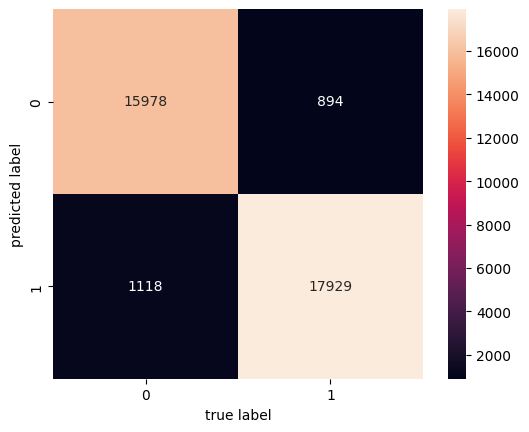

In [83]:
# Visualize the performance using a confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_data.fake, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', 
            xticklabels='auto', yticklabels='auto')
plt.xlabel('true label')
plt.ylabel('predicted label');

Accuracy of predicting *True News* = 15978/16872*100 = **94.7%**

Accuracy of predicting *Fake News* = 17929/19047*100 = **94.1%**

In [46]:
# Create a utility to categorise whether a news story is True or Fake
def predict_news_category(s, train_data=train_data, model = model):
    pred = model.predict([s])
    if pred == ['1']:
        print('Fake News')
    elif pred == ['0']:
        print('True News')

In [85]:
# These are fake news headings
predict_news_category('Avril Lavigne conspiracy theory - star died 15 years ago and was replaced by an actress')
predict_news_category("Princess Diana and King Charles III's secret daughter is named Sarah, allegedly")
predict_news_category('donald trump want to undergo an operation to turn himself into a giraffe')
predict_news_category('barack obama and lady gaga are the same person')


# These are true news heading
predict_news_category('The West is struggling to set an oil price cap that hurts Russia')
predict_news_category('CIA director met with Russian counterpart to manage nuclear risks, US diplomat says')

Fake News
Fake News
Fake News
Fake News
True News
True News
